In [2]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/e2/7b/8c1b410cd0604cee9a167a19f7e1746f5b92ae7d02ad574ab560b73c5a48/xgboost-2.1.1-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 16.8 MB/s eta 0:00:08
   ---------------------------------------- 1.1/124.9 MB 11.3 MB/s eta 0:00:11
    --------------------------------------- 1.7/124.9 MB 13.7 MB/s eta 0:00:10
    --------------------------------------- 2.3/124.9 MB 12.3 MB/s eta 0:00:11
    --------------------------------------- 3.0/124.9 MB 13.7 MB/s eta 0:00:09
   - -------------------------------------- 3.7/124.9 MB 13.1 MB/s eta 0:00:10
   - -------------------------------------- 4.4/124.9 MB 13.2 MB/s eta 0:00:10
   - -------------------------------------- 5.0/124.9 MB 13.4 MB/s eta 0:00:09
   - -------------------------------------- 5.7/124.9 MB 13.5 MB/s eta 0:00:09
   -- -------

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import xgboost as xgb

# 1. Load your dataset
data = pd.read_csv(r'D:\research project\Hyperspectral_data_millets_11_varieties.csv')

# 2. Separate features (X) and target (y)
X = data.drop(columns=['Samples', 'Carbohydrate'])  # Features: hyperspectral data (wavelengths)
y = data['Carbohydrate']  # Target: Carbohydrate values

# 3. Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Train XGBoost Regressor model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# 6. Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test_scaled)

# 7. Evaluate the model performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"Mean Squared Error (MSE): {mse_xgb}")
print(f"R² Score: {r2_xgb}")

# 8. Print actual vs predicted values side-by-side
comparison_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred_xgb})
print(comparison_df)



Mean Squared Error (MSE): 3.576331938939567
R² Score: 0.820336959249541
     Actual  Predicted
0     73.73  73.625999
1     73.73  73.007675
2     73.73  73.568878
3     71.92  69.669876
4     67.41  67.182922
..      ...        ...
259   67.81  69.905251
260   67.81  68.384232
261   71.52  71.753654
262   70.92  70.061356
263   69.84  69.337006

[264 rows x 2 columns]


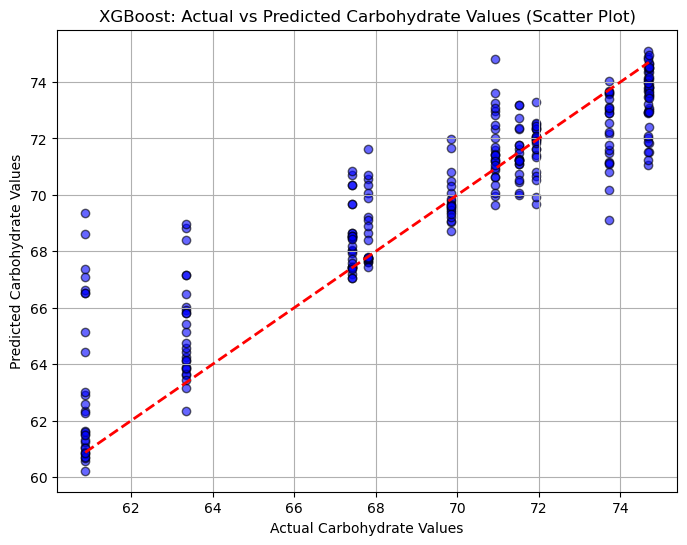

In [4]:
# 9. Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, color='blue', edgecolor='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Carbohydrate Values')
plt.ylabel('Predicted Carbohydrate Values')
plt.title('XGBoost: Actual vs Predicted Carbohydrate Values (Scatter Plot)')
plt.grid(True)
plt.show()

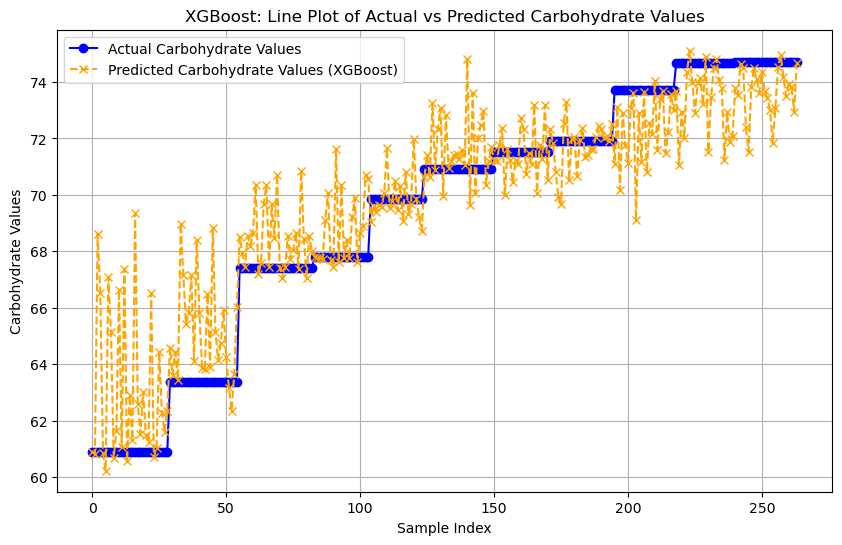

In [5]:
# 10. Line plot of actual vs predicted values
# Sort values for better visualization
y_test_sorted_idx = y_test.argsort()
y_test_sorted = y_test.iloc[y_test_sorted_idx].reset_index(drop=True)
y_pred_sorted = pd.Series(y_pred_xgb).iloc[y_test_sorted_idx].reset_index(drop=True)

# Plot actual and predicted values in a line plot
plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted, label='Actual Carbohydrate Values', color='blue', marker='o')
plt.plot(y_pred_sorted, label='Predicted Carbohydrate Values (XGBoost)', color='orange', linestyle='dashed', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Carbohydrate Values')
plt.title('XGBoost: Line Plot of Actual vs Predicted Carbohydrate Values')
plt.legend()
plt.grid(True)
plt.show()